In [ ]:
import pandas as pd
import glob
import numpy as np
import re

In [ ]:
df_files=pd.read_csv("/content/drive/MyDrive/Enhanced_ML_Framework/final/OTU_CRC_4168_final.tsv",sep="\t")
df_files

,name,ERR1018185,ERR1018186,ERR1018187,ERR1018188,ERR1018189,ERR1018190,ERR1018191,ERR1018192,ERR1018193,...,SRR8865592,SRR8865593,SRR8865594,SRR8865595,SRR8865596,SRR8865597,SRR8865598,SRR8865599,SRR8865600,SRR8865601
0,MGYG000003389,0,0,0,10,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fibrobacter_A_intestinalis,52,0,10,13,41,0,0,0,35,...,0,0,0,0,0,0,0,0,0,0
2,UBA4248_sp004554395,64,42,15,0,76,0,0,12,33,...,0,0,0,0,0,0,10,0,0,0
3,MGYG000003670,0,0,0,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bruticola_sp004554425,77,684,13,240,184,0,0,318,43,...,0,0,0,25,0,0,45,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,CAG-83_sp900547745,95637,2756,2717,2299,12152,1573,244,166,762,...,233,1847,331,15,0,2320,1067,32,2636,58
4598,CAG-83_sp000431575,133941,310679,13939,555676,86503,304452,2920,37209,61607,...,1175,2537,45,38,21,1219,645,439,773,654
4599,CAG-83_sp003539495,157833,2709,122592,10902,5796,1173,710,282,30551,...,18562,1743,130,0,0,1572,4464,20,14572,236
4600,CAG-83_sp000435555,166900,3796,9058,11143,11613,2727,1275,407,1276,...,1744,73094,498,21,0,73394,3854,71,9491,291


In [ ]:
# Sum reads for each sample (skip the first column by index)
total_reads_per_sample = df_files.drop(columns=['name']).sum(axis=0)

# If you want, convert to DataFrame
total_reads_df = total_reads_per_sample.reset_index()
total_reads_df.columns = ['Sample', 'Total_reads']
total_reads_df

,Sample,Total_reads
0,ERR1018185,46850318
1,ERR1018186,40211582
2,ERR1018187,40063749
3,ERR1018188,43009637
4,ERR1018189,47639015
...,...,...
4163,SRR8865597,5464779
4164,SRR8865598,19786608
4165,SRR8865599,5772405
4166,SRR8865600,4790404


In [ ]:
total_reads_df.describe()

,Total_reads
count,4.168000e+03
mean,2.722635e+07
std,2.293149e+07
min,3.014700e+04
25%,6.986971e+06
50%,2.429932e+07
75%,4.197342e+07
max,1.843995e+08


In [ ]:
total_reads_df["Total_reads"] = pd.to_numeric(total_reads_df["Total_reads"], errors='coerce') #Convert the Total_reads column to numeric
high_depth_samples = total_reads_df[total_reads_df["Total_reads"] > 1000000]# keep only the rows where "Total_reads" is greater than one million reads.
high_depth_samples

,Sample,Total_reads
0,ERR1018185,46850318
1,ERR1018186,40211582
2,ERR1018187,40063749
3,ERR1018188,43009637
4,ERR1018189,47639015
...,...,...
4163,SRR8865597,5464779
4164,SRR8865598,19786608
4165,SRR8865599,5772405
4166,SRR8865600,4790404


In [ ]:
df_out=pd.read_csv("/content/drive/MyDrive/Enhanced_ML_Framework/final/OTU_CRC_4168_final.tsv",sep="\t")
df_out.index=df_out["name"].values
df_out=df_out.drop(columns="name")

df_out


,ERR1018185,ERR1018186,ERR1018187,ERR1018188,ERR1018189,ERR1018190,ERR1018191,ERR1018192,ERR1018193,ERR1018194,...,SRR8865592,SRR8865593,SRR8865594,SRR8865595,SRR8865596,SRR8865597,SRR8865598,SRR8865599,SRR8865600,SRR8865601
MGYG000003389,0,0,0,10,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fibrobacter_A_intestinalis,52,0,10,13,41,0,0,0,35,0,...,0,0,0,0,0,0,0,0,0,0
UBA4248_sp004554395,64,42,15,0,76,0,0,12,33,0,...,0,0,0,0,0,0,10,0,0,0
MGYG000003670,0,0,0,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bruticola_sp004554425,77,684,13,240,184,0,0,318,43,41,...,0,0,0,25,0,0,45,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAG-83_sp900547745,95637,2756,2717,2299,12152,1573,244,166,762,181,...,233,1847,331,15,0,2320,1067,32,2636,58
CAG-83_sp000431575,133941,310679,13939,555676,86503,304452,2920,37209,61607,17855,...,1175,2537,45,38,21,1219,645,439,773,654
CAG-83_sp003539495,157833,2709,122592,10902,5796,1173,710,282,30551,152,...,18562,1743,130,0,0,1572,4464,20,14572,236
CAG-83_sp000435555,166900,3796,9058,11143,11613,2727,1275,407,1276,477,...,1744,73094,498,21,0,73394,3854,71,9491,291


In [ ]:
sample_sums = df_out.sum(axis=0)

# Find samples with total reads < 100k(1 million)
low_read_samples = sample_sums[sample_sums < 100000].index.tolist()
print(f"Number of low-read samples (<100k): {len(low_read_samples)}")

df_filtered = df_out.drop(columns=low_read_samples)
df_filtered

Number of low-read samples (<100k): 5


,ERR1018185,ERR1018186,ERR1018187,ERR1018188,ERR1018189,ERR1018190,ERR1018191,ERR1018192,ERR1018193,ERR1018194,...,SRR8865592,SRR8865593,SRR8865594,SRR8865595,SRR8865596,SRR8865597,SRR8865598,SRR8865599,SRR8865600,SRR8865601
MGYG000003389,0,0,0,10,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fibrobacter_A_intestinalis,52,0,10,13,41,0,0,0,35,0,...,0,0,0,0,0,0,0,0,0,0
UBA4248_sp004554395,64,42,15,0,76,0,0,12,33,0,...,0,0,0,0,0,0,10,0,0,0
MGYG000003670,0,0,0,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bruticola_sp004554425,77,684,13,240,184,0,0,318,43,41,...,0,0,0,25,0,0,45,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAG-83_sp900547745,95637,2756,2717,2299,12152,1573,244,166,762,181,...,233,1847,331,15,0,2320,1067,32,2636,58
CAG-83_sp000431575,133941,310679,13939,555676,86503,304452,2920,37209,61607,17855,...,1175,2537,45,38,21,1219,645,439,773,654
CAG-83_sp003539495,157833,2709,122592,10902,5796,1173,710,282,30551,152,...,18562,1743,130,0,0,1572,4464,20,14572,236
CAG-83_sp000435555,166900,3796,9058,11143,11613,2727,1275,407,1276,477,...,1744,73094,498,21,0,73394,3854,71,9491,291


# **Prevalence calculation**
# ⏰



```python
species_prevalence = (df_filtered > 0).sum(axis=1) / df_filtered.shape[1]
```

---

###  Step 1:  the input DataFrame

have a pandas DataFrame called `df_filtered` that looks like this:

| Species     | Sample_1 | Sample_2 | Sample_3 | Sample_4 |
| ----------- | -------- | -------- | -------- | -------- |
| *Species_A* | 10       | 0        | 5        | 0        |
| *Species_B* | 0        | 0        | 0        | 12       |
| *Species_C* | 3        | 7        | 2        | 1        |

Here:

* Each **row** = one species
* Each **column** = one sample
* Each **value** = abundance or count (0 means “not detected”)

---

###  Step 2: `(df_filtered > 0)`

This expression performs an **element-wise comparison**, checking whether each cell value is greater than zero.

It converts numeric values into **boolean values** (`True` or `False`):

| Species     | Sample_1 | Sample_2 | Sample_3 | Sample_4 |
| ----------- | -------- | -------- | -------- | -------- |
| *Species_A* | True     | False    | True     | False    |
| *Species_B* | False    | False    | False    | True     |
| *Species_C* | True     | True     | True     | True     |

So:

* `True` = species **present** in that sample
* `False` = species **absent**

---

###  Step 3: `.sum(axis=1)`

The `sum()` method counts `True` values across each **row** (`axis=1` means “sum across columns”).
In pandas, `True` is treated as `1`, and `False` as `0`.

So you get:

| Species     | Sum(True values) |
| ----------- | ---------------- |
| *Species_A* | 2                |
| *Species_B* | 1                |
| *Species_C* | 4                |

This means:

* *Species_A* is present in 2 out of 4 samples.
* *Species_B* is present in 1 out of 4 samples.
* *Species_C* is present in all 4 samples.

---

###  Step 4: `df_filtered.shape[1]`

`df_filtered.shape` gives a tuple:
`(number_of_rows, number_of_columns)`

Here:

* `df_filtered.shape[0]` → number of species
* `df_filtered.shape[1]` → number of samples

So if there are 4 samples (columns), then:

```python
df_filtered.shape[1] == 4
```

---

###  Step 5: Divide the two

Now, we divide the number of samples where each species is present by the **total number of samples**:

| Species     | Present in | Total samples | Prevalence (fraction) |
| ----------- | ---------- | ------------- | --------------------- |
| *Species_A* | 2          | 4             | 0.5                   |
| *Species_B* | 1          | 4             | 0.25                  |
| *Species_C* | 4          | 4             | 1.0                   |

That’s what this line computes:

```python
species_prevalence = (df_filtered > 0).sum(axis=1) / df_filtered.shape[1]
```

---

### Step 6: What you get in `species_prevalence`

It’s a **pandas Series** like this:

```
Species_A    0.50
Species_B    0.25
Species_C    1.00
dtype: float64
```

Each number tells you the **fraction of samples** where the species was detected —
i.e., the **prevalence**.

---

###  Formula Summary

Mathematically, for each species *i*:
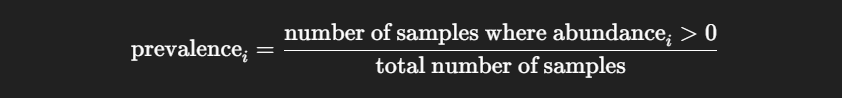

---

###  **In essence:**

This line of code calculates **how widespread each species is** across your dataset.

| Concept                  | Meaning                                                 |
| ------------------------ | ------------------------------------------------------- |
| `> 0`                    | Check presence/absence                                  |
| `.sum(axis=1)`           | Count how many samples contain the species              |
| `/ df_filtered.shape[1]` | Convert count to proportion (fraction of total samples) |

---


In [ ]:
import pandas as pd
import numpy as np

# Calculate prevalence for each species
species_prevalence = (df_filtered > 0).sum(axis=1) / df_filtered.shape[1]


species_prevalence_percent = (species_prevalence * 100).round().astype(int)  # convert prevalence fraction to a percentage.
#.round() → round to the nearest whole number.
#.astype(int) → convert from float to integer.

# Count species at each exact prevalence percentage
prevalence_counts = species_prevalence_percent.value_counts().reindex(range(0, 101), fill_value=0)
#.value_counts() → counts how many species have each prevalence percentage.(e.g., 50 species are at 10%, 30 at 100%, etc.)
#.reindex(range(0, 101), fill_value=0) → ensures that all percentages from 0 to 100 appear in the result, even if some have no species (fill them with zero).
# So now, prevalence_counts is a Series where:
# Index = prevalence percentage (0–100)
# Value = number of species at that exact prevalence

print("Number of species at each exact prevalence percentage (0–100%):")
print(prevalence_counts)
# it calculates species prevalence (how common each species is across samples) and counts how many species occur at each prevalence percentage (from 0% to 100%)

Number of species at each exact prevalence percentage (0–100%):
0        1
1        7
2       10
3       10
4       13
      ... 
96      91
97     101
98     112
99     140
100     83
Name: count, Length: 101, dtype: int64


In [ ]:
species_selected = df_filtered[species_prevalence_percent >= 20]#Select species found in ≥20% of samples
species_selected

,ERR1018185,ERR1018186,ERR1018187,ERR1018188,ERR1018189,ERR1018190,ERR1018191,ERR1018192,ERR1018193,ERR1018194,...,SRR8865592,SRR8865593,SRR8865594,SRR8865595,SRR8865596,SRR8865597,SRR8865598,SRR8865599,SRR8865600,SRR8865601
Fibrobacter_A_intestinalis,52,0,10,13,41,0,0,0,35,0,...,0,0,0,0,0,0,0,0,0,0
UBA4248_sp004554395,64,42,15,0,76,0,0,12,33,0,...,0,0,0,0,0,0,10,0,0,0
Bruticola_sp004554425,77,684,13,240,184,0,0,318,43,41,...,0,0,0,25,0,0,45,0,61,0
Bruticola_sp900772775,80,40,79,174,81,0,0,0,0,10,...,0,21,0,0,0,75,0,0,0,0
MGYG000002669,97,21,21,0,464,11,0,47,14,0,...,0,2024,232,0,0,11,151,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAG-83_sp900547745,95637,2756,2717,2299,12152,1573,244,166,762,181,...,233,1847,331,15,0,2320,1067,32,2636,58
CAG-83_sp000431575,133941,310679,13939,555676,86503,304452,2920,37209,61607,17855,...,1175,2537,45,38,21,1219,645,439,773,654
CAG-83_sp003539495,157833,2709,122592,10902,5796,1173,710,282,30551,152,...,18562,1743,130,0,0,1572,4464,20,14572,236
CAG-83_sp000435555,166900,3796,9058,11143,11613,2727,1275,407,1276,477,...,1744,73094,498,21,0,73394,3854,71,9491,291


In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataframe is df_filtered (species x samples)

# Step 1: Add pseudocount to avoid log(0)
df_pseudo = species_selected + 1

# Step 2: Compute geometric mean for each species (row)
# CLR is log(value / geometric mean of row)
geometric_mean = np.exp(np.log(df_pseudo).mean(axis=1))  # row-wise geometric mean

# Step 3: Apply CLR transformation
df_clr = np.log(df_pseudo.div(geometric_mean, axis=0))

print("CLR-transformed table:")
print(df_clr)

CLR-transformed table:
                            ERR1018185  ERR1018186  ERR1018187  ERR1018188  \
Fibrobacter_A_intestinalis    2.969496   -1.000796    1.397100    1.638262   
UBA4248_sp004554395           2.222455    1.809268    0.820657   -1.951932   
Bruticola_sp004554425         1.177209    3.349919   -0.540442    2.305297   
Bruticola_sp900772775         2.624588    1.943711    2.612165    3.394925   
MGYG000002669                 3.360551    1.866626    1.866626   -1.224417   
...                                ...         ...         ...         ...   
CAG-83_sp900547745            5.222157    1.675730    1.661483    1.494496   
CAG-83_sp000431575            3.752683    4.594039    1.490038    5.175463   
CAG-83_sp003539495            5.471456    1.406861    5.218782    2.798950   
CAG-83_sp000435555            4.164486    0.381296    1.250844    1.457986   
CAG-83_sp900545495            5.611436    1.718409    2.081344    1.193658   

                            ERR1018189  

In [ ]:
clr_df=df_clr.T
clr_df

,Fibrobacter_A_intestinalis,UBA4248_sp004554395,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,UBA1436_sp002329395,UBA1174_sp900556855,Campylobacter_B_sp900539505,Campylobacter_B_ureolyticus,Campylobacter_B_hominis,...,CAG-83_sp900545585,CAG-83_sp900554275,CAG-83_sp001916855,CAG-83_sp900552475,CAG-83_sp900548615,CAG-83_sp900547745,CAG-83_sp000431575,CAG-83_sp003539495,CAG-83_sp000435555,CAG-83_sp900545495
ERR1018185,2.969496,2.222455,1.177209,2.624588,3.360551,2.726073,4.686832,-1.655623,-1.092553,2.403472,...,3.131909,3.392057,3.510590,4.846377,4.121749,5.222157,3.752683,5.471456,4.164486,5.611436
ERR1018186,-1.000796,1.809268,3.349919,1.943711,1.866626,-0.829275,-1.068910,2.919088,3.870292,1.440034,...,1.712754,2.682404,2.147080,4.549167,1.377180,1.675730,4.594039,1.406861,0.381296,1.718409
ERR1018187,1.397100,0.820657,-0.540442,2.612165,1.866626,3.213776,2.149966,-1.655623,-1.092553,1.710324,...,2.109703,2.419121,4.505178,3.113737,1.590397,1.661483,1.490038,5.218782,1.250844,2.081344
ERR1018188,1.638262,-1.951932,2.305297,3.394925,-1.224417,1.735674,2.427598,-1.655623,3.155942,3.314485,...,1.270434,1.331083,1.197315,1.750027,0.938207,1.494496,5.175463,2.798950,1.457986,1.193658
ERR1018189,2.736874,2.391873,2.040856,2.636858,4.917621,2.781643,4.644823,0.742272,2.403955,0.637688,...,2.361662,2.712366,2.128779,2.259239,2.280459,3.159163,3.315467,2.167253,1.499296,2.595822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8865597,-1.000796,-1.951932,-3.179500,2.560872,1.260490,-0.829275,2.594652,-1.655623,2.203284,-1.927262,...,0.042280,0.866657,3.025666,0.145094,1.064992,1.503585,-0.945873,0.862897,3.342941,1.307944
SRR8865598,-1.000796,0.445963,0.649142,-1.769861,3.799464,2.306219,2.644662,2.057949,-1.092553,-1.927262,...,0.392641,1.056285,-0.700132,-0.290516,1.164781,0.727375,-1.581680,1.906181,0.396456,0.745333
SRR8865599,-1.000796,-1.951932,-3.179500,-1.769861,-1.224417,-0.829275,-1.068910,0.742272,-1.092553,-1.927262,...,-2.735763,-2.067150,-3.140303,-2.575881,-1.751980,-2.749661,-1.965705,-3.453321,-3.584004,-3.377611
SRR8865600,-1.000796,-1.951932,0.947635,-1.769861,-1.224417,2.538021,3.058224,2.173019,-1.092553,-1.927262,...,1.346636,1.331083,0.022531,0.568061,2.215175,1.631229,-1.400908,3.089083,1.297534,1.599889


In [ ]:
meta_df=pd.read_csv("/content/drive/MyDrive/Enhanced_ML_Framework/final/meadata_crc_final.tsv",sep="\t")
meta_df['Health_status'] = meta_df['Health_status'].str.strip()

meta_df['class_label'] = meta_df['Health_status'].apply(lambda x: 1 if x == 'Healthy' else 0)


meta_df

,Run_ID,BioProject,BioSample,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage,class_label
0,SRR30861073,PRJNA1167935,SAMN44019356,Non-Healthy,CRC,Colorectal Cancer,FEMALE,75.0,Turkey,ILLUMINA,NaN,II,0
1,SRR30861074,PRJNA1167935,SAMN44019355,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,Turkey,ILLUMINA,NaN,IV,0
2,SRR30861075,PRJNA1167935,SAMN44019379,Healthy,Healthy,Healthy,MALE,64.0,Turkey,ILLUMINA,NaN,NaN,1
3,SRR30861076,PRJNA1167935,SAMN44019377,Healthy,Healthy,Healthy,FEMALE,46.0,Turkey,ILLUMINA,NaN,NaN,1
4,SRR30861077,PRJNA1167935,SAMN44019374,Healthy,Healthy,Healthy,MALE,52.0,Turkey,ILLUMINA,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4896,ERR1018308,PRJEB10878,SAMEA3541592,Healthy,Healthy,Healthy,MALE,61.0,China,Illumina HiSeq 2000 platform,23.8,NaN,1
4897,ERR1018309,PRJEB10878,SAMEA3541593,Healthy,Healthy,Healthy,MALE,62.0,China,Illumina HiSeq 2000 platform,21.5,NaN,1
4898,ERR1018310,PRJEB10878,SAMEA3541594,Non-healthy,CRC,Colorectal Cancer,MALE,68.0,China,Illumina HiSeq 2000 platform,23.7,NaN,0
4899,ERR1018311,PRJEB10878,SAMEA3541595,Non-healthy,CRC,Colorectal Cancer,MALE,55.0,China,Illumina HiSeq 2000 platform,25.8,NaN,0


In [ ]:
merge_df=pd.merge(clr_df,meta_df, left_index=True,right_on="Run_ID")
merge_df

,Fibrobacter_A_intestinalis,UBA4248_sp004554395,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,UBA1436_sp002329395,UBA1174_sp900556855,Campylobacter_B_sp900539505,Campylobacter_B_ureolyticus,Campylobacter_B_hominis,...,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage,class_label
4773,2.969496,2.222455,1.177209,2.624588,3.360551,2.726073,4.686832,-1.655623,-1.092553,2.403472,...,Non-healthy,CRC,Colorectal Cancer,MALE,64.0,China,Illumina HiSeq 2000 platform,23.1,NaN,0
4774,-1.000796,1.809268,3.349919,1.943711,1.866626,-0.829275,-1.068910,2.919088,3.870292,1.440034,...,Non-healthy,CRC,Colorectal Cancer,MALE,73.0,China,Illumina HiSeq 2000 platform,23.8,NaN,0
4775,1.397100,0.820657,-0.540442,2.612165,1.866626,3.213776,2.149966,-1.655623,-1.092553,1.710324,...,Non-healthy,CRC,Colorectal Cancer,FEMALE,67.0,China,Illumina HiSeq 2000 platform,24.7,NaN,0
4776,1.638262,-1.951932,2.305297,3.394925,-1.224417,1.735674,2.427598,-1.655623,3.155942,3.314485,...,Non-healthy,CRC,Colorectal Cancer,MALE,56.0,China,Illumina HiSeq 2000 platform,25.6,NaN,0
4777,2.736874,2.391873,2.040856,2.636858,4.917621,2.781643,4.644823,0.742272,2.403955,0.637688,...,Non-healthy,CRC,Colorectal Cancer,FEMALE,59.0,China,Illumina HiSeq 2000 platform,20.7,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-1.000796,-1.951932,-3.179500,2.560872,1.260490,-0.829275,2.594652,-1.655623,2.203284,-1.927262,...,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,India,ILLUMINA,19.1,III,0
630,-1.000796,0.445963,0.649142,-1.769861,3.799464,2.306219,2.644662,2.057949,-1.092553,-1.927262,...,Non-Healthy,CRC,Colorectal Cancer,MALE,62.0,India,ILLUMINA,20.1,I,0
631,-1.000796,-1.951932,-3.179500,-1.769861,-1.224417,-0.829275,-1.068910,0.742272,-1.092553,-1.927262,...,Non-Healthy,CRC,Colorectal Cancer,FEMALE,65.0,India,ILLUMINA,21.0,III,0
628,-1.000796,-1.951932,0.947635,-1.769861,-1.224417,2.538021,3.058224,2.173019,-1.092553,-1.927262,...,Non-Healthy,CRC,Colorectal Cancer,FEMALE,41.0,India,ILLUMINA,19.2,I,0


In [ ]:
ml_df = merge_df.drop(columns=['Run_ID','BioProject','BioSample','Health_status','Phenotype',
                               'Full_Name','Sex','Age','Location','Platform','BMI','CRC stage'])
ml_df

,Fibrobacter_A_intestinalis,UBA4248_sp004554395,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,UBA1436_sp002329395,UBA1174_sp900556855,Campylobacter_B_sp900539505,Campylobacter_B_ureolyticus,Campylobacter_B_hominis,...,CAG-83_sp900554275,CAG-83_sp001916855,CAG-83_sp900552475,CAG-83_sp900548615,CAG-83_sp900547745,CAG-83_sp000431575,CAG-83_sp003539495,CAG-83_sp000435555,CAG-83_sp900545495,class_label
4773,2.969496,2.222455,1.177209,2.624588,3.360551,2.726073,4.686832,-1.655623,-1.092553,2.403472,...,3.392057,3.510590,4.846377,4.121749,5.222157,3.752683,5.471456,4.164486,5.611436,0
4774,-1.000796,1.809268,3.349919,1.943711,1.866626,-0.829275,-1.068910,2.919088,3.870292,1.440034,...,2.682404,2.147080,4.549167,1.377180,1.675730,4.594039,1.406861,0.381296,1.718409,0
4775,1.397100,0.820657,-0.540442,2.612165,1.866626,3.213776,2.149966,-1.655623,-1.092553,1.710324,...,2.419121,4.505178,3.113737,1.590397,1.661483,1.490038,5.218782,1.250844,2.081344,0
4776,1.638262,-1.951932,2.305297,3.394925,-1.224417,1.735674,2.427598,-1.655623,3.155942,3.314485,...,1.331083,1.197315,1.750027,0.938207,1.494496,5.175463,2.798950,1.457986,1.193658,0
4777,2.736874,2.391873,2.040856,2.636858,4.917621,2.781643,4.644823,0.742272,2.403955,0.637688,...,2.712366,2.128779,2.259239,2.280459,3.159163,3.315467,2.167253,1.499296,2.595822,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-1.000796,-1.951932,-3.179500,2.560872,1.260490,-0.829275,2.594652,-1.655623,2.203284,-1.927262,...,0.866657,3.025666,0.145094,1.064992,1.503585,-0.945873,0.862897,3.342941,1.307944,0
630,-1.000796,0.445963,0.649142,-1.769861,3.799464,2.306219,2.644662,2.057949,-1.092553,-1.927262,...,1.056285,-0.700132,-0.290516,1.164781,0.727375,-1.581680,1.906181,0.396456,0.745333,0
631,-1.000796,-1.951932,-3.179500,-1.769861,-1.224417,-0.829275,-1.068910,0.742272,-1.092553,-1.927262,...,-2.067150,-3.140303,-2.575881,-1.751980,-2.749661,-1.965705,-3.453321,-3.584004,-3.377611,0
628,-1.000796,-1.951932,0.947635,-1.769861,-1.224417,2.538021,3.058224,2.173019,-1.092553,-1.927262,...,1.331083,0.022531,0.568061,2.215175,1.631229,-1.400908,3.089083,1.297534,1.599889,0


# **Model on ORIGINAL DATASET**
# **🚹**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# --- Step 1: Prepare X and y ---
# Get feature names before converting to NumPy array
feature_names = ml_df.drop(columns=['class_label']).columns
X = ml_df.drop(columns=['class_label']).values  # features
y = ml_df['class_label'].values                 # labels

# --- Step 2: Split into training and test sets (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_scaled = X_train
X_test_scaled = X_test


# --- Step 4: Define multiple models ---
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42)
}

# --- Step 5: Train, predict, and evaluate each model ---
results = {}
conf_mats = {}

for name, model in models.items():
    # Some models benefit from scaled data, others don't strictly require it
    # For simplicity and robustness, we'll use scaled data for all here.
    # If you want to be more precise, you could conditionally use scaled vs. original data.
    if name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else: # For tree-based models, scaling is often not necessary
         model.fit(X_train, y_train)
         y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    conf_mats[name] = confusion_matrix(y_test, y_pred)

    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# --- Step 6: Compare models by accuracy ---
print("\n--- Model Comparison ---")
comparison_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)
print(comparison_df)


--- Logistic Regression ---
Accuracy: 0.8022

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       503
           1       0.73      0.79      0.76       326

    accuracy                           0.80       829
   macro avg       0.79      0.80      0.80       829
weighted avg       0.81      0.80      0.80       829


Confusion Matrix:
[[407  96]
 [ 68 258]]

--- Random Forest ---
Accuracy: 0.8046

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       503
           1       0.82      0.65      0.72       326

    accuracy                           0.80       829
   macro avg       0.81      0.78      0.79       829
weighted avg       0.81      0.80      0.80       829


Confusion Matrix:
[[456  47]
 [115 211]]

--- Support Vector Machine ---
Accuracy: 0.8034

Classification Report:
              precision    recall  f1-score   support



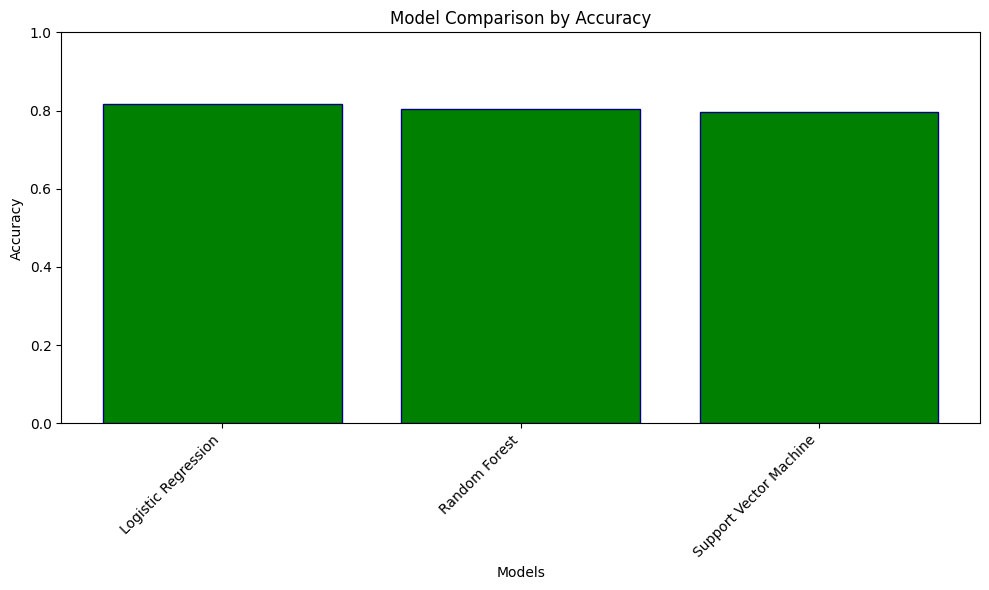

In [ ]:
import matplotlib.pyplot as plt

# --- Visualize Model Comparison ---
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color='green', edgecolor='navy')
plt.title('Model Comparison by Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# **Feature Selection via L1 Regularization (Lasso)**

In [ ]:
# --- Step 3: Feature Selection via L1 Regularization (Lasso) Methods ---


from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # Import StandardScaler
import numpy as np
import pandas as pd

# --- Assume X_train, X_test, y_train, y_test are already defined ---

# If X_train is a pandas DataFrame, extract feature names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]


#  Logistic Regression with L1 penalty
lasso_estimator = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    random_state=42,
    C=0.1 # Reduced C for more regularization
)

#  Use SelectFromModel for feature selection (faster than RFE)
selector = SelectFromModel(estimator=lasso_estimator)

# Fit the selector on the scaled training data
selector.fit(X_train_scaled, y_train)


#  Transform training and test data to selected features
X_train_lasso = selector.transform(X_train_scaled) # Use scaled data for transformation
X_test_lasso = selector.transform(X_test_scaled) # Use scaled data for transformation


#  Extract selected feature names
selected_features_lasso = np.array(feature_names)[selector.get_support()].tolist()

#  Print output
print("Selected features (L1/Lasso):")
for f in selected_features_lasso:
    print("-", f)

print(f"\nTotal selected features: {len(selected_features_lasso)} / {len(feature_names)}")

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split

X_train_selected = X_train_lasso
X_test_selected = X_test_lasso
selected_features = selected_features_lasso

# --- Step 4: Model Building on Selected Features ---

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

trained_models = {}
predictions = {}

for name, model in models.items():
    # Train the model
    trained_models[name] = model.fit(X_train_selected, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_selected)
    predictions[name] = y_pred

# --- Step 5: Model Evaluation ---

print("\n--- Model Evaluation ---")
for name in models.keys():
    y_pred = predictions[name]
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# --- Compare Model Accuracy ---
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate accuracy for each model
accuracies = {name: accuracy_score(y_test, predictions[name]) for name in models.keys()}

# Print accuracies
print("\n--- Model Accuracy Comparison ---")
for name, acc in accuracies.items():
    print(f"{name}: {acc:.4f}")




--- Model Evaluation ---

Logistic Regression:
Accuracy: 0.8070

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       503
           1       0.75      0.77      0.76       326

    accuracy                           0.81       829
   macro avg       0.80      0.80      0.80       829
weighted avg       0.81      0.81      0.81       829


Confusion Matrix:
[[418  85]
 [ 75 251]]

SVM:
Accuracy: 0.8118

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       503
           1       0.77      0.75      0.76       326

    accuracy                           0.81       829
   macro avg       0.80      0.80      0.80       829
weighted avg       0.81      0.81      0.81       829


Confusion Matrix:
[[429  74]
 [ 82 244]]

Random Forest:
Accuracy: 0.7998

Classification Report:
              precision    recall  f1-score   support

           0  

# **HYPERPARAMETER TUNING**


 Tuning RandomForest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
 Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

 Tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
 Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

 Tuning LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
 Best parameters for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}

RandomForest Performance:
Accuracy: 0.7949
Precision: 0.7977
Recall: 0.6411
F1-Score: 0.7109
ROC-AUC: 0.8947
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       503
           1       0.80      0.64      0.71       326

    accuracy                           0.79       829
   macro avg       0.80      0.77      0.78       829
weighted avg       0.80      0.79      0.79       829


SVM Performance:
Accuracy: 0.8142
Precis

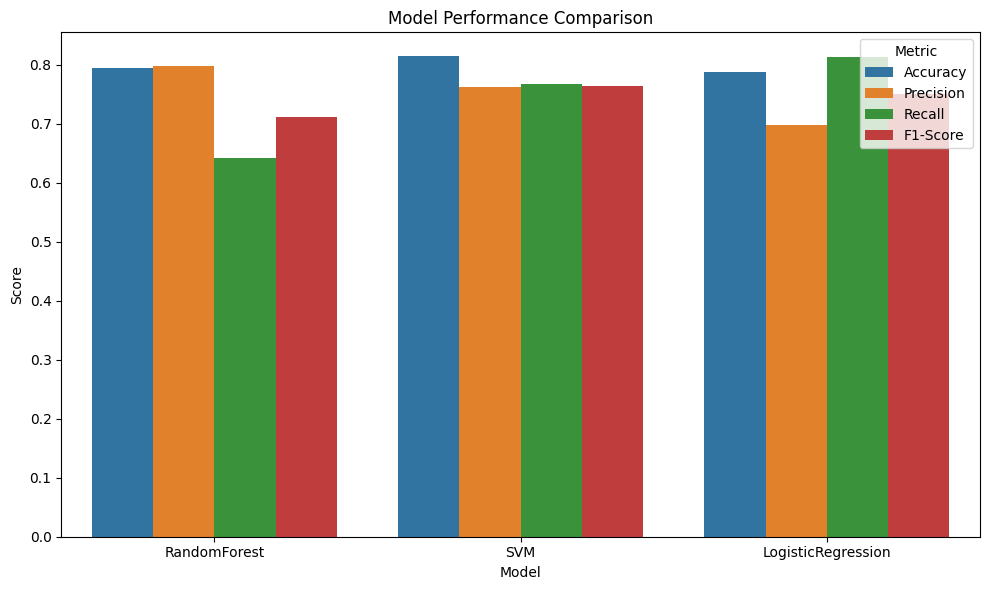

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Step 3: Model Building and Hyperparameter Tuning
# Add DecisionTree and KNN models
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(probability=False, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    }

    }


# Dictionary to store results
results = {}

# Stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)# save this result

# Train and tune each model
for name, config in models.items():
    print(f"\n Tuning {name}...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=cv,
        scoring='f1',# use balace at this place
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(f" Best parameters for {name}: {grid_search.best_params_}")

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        'classification_report': classification_report(y_test, y_pred)
    }

# Step 4: Evaluation and Comparison
for name, metrics in results.items():
    print(f"\n{name} Performance:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1']:.4f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.4f}" if metrics['roc_auc'] is not None else "ROC-AUC: N/A")
    print("Classification Report:")
    print(metrics['classification_report'])

# Step 5: Model Comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'Precision': [results[name]['precision'] for name in results],
    'Recall': [results[name]['recall'] for name in results],
    'F1-Score': [results[name]['f1'] for name in results],
    'ROC-AUC': [results[name]['roc_auc'] if results[name]['roc_auc'] is not None else 'N/A' for name in results]
})

print("\n Model Comparison:")
print(comparison_df)

# Optional: visualize performance
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score']),
            x='Model', y='value', hue='variable')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save all models with default parameters (not just best models)
for name, model_instance in models.items():
    joblib.dump(model_instance, f"{name}_model.pkl")
    print(f"{name} model saved as {name}_model.pkl")

# Save the scaler
# joblib.dump(scaler, "scaler.pkl")
# print("Scaler saved as scaler.pkl")

Logistic Regression model saved as Logistic Regression_model.pkl
Random Forest model saved as Random Forest_model.pkl
Support Vector Machine model saved as Support Vector Machine_model.pkl


In [ ]:
import os
os.getcwd()
os.chdir("/content/drive/MyDrive/Enhanced_ML_Framework/final")
os.getcwd()

'/content/drive/MyDrive/Enhanced_ML_Framework/final'